# Income classification problem


Income classification
Prediction task is to determine whether a person makes over 50K a year.


https://www.kaggle.com/lodetomasi1995/income-classification



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Import

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ceccode/mlbookcamp/main/datasets/income_evaluation.csv')

# Exploratory data analysis

In [3]:
print(data.shape)

(32561, 15)


there are 32561 instances and 15 attributes in the data set.

* **age**:​the age of an individual 
  - Integer greater than 0
* **workclass**:​a general term to represent the employment status of an individual
  - Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov, Without­pay, Never­worked.
* **fnlwgt**:​final weight. In other words, this is the number of people the census believes
the entry represents..
  - Integer greater than 0
* **education**:​the highest level of education achieved by an individual.
  - Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc, 9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool. 
* **education­num**:​the highest level of education achieved in numerical form.
  - Integer greater than 0
* **marital­status**: ​marital status of an individual. Married­ civ­spouse corresponds to a civilian spouse while Married­AF­spouse is a spouse in the Armed Forces. 
  - Married­civ­spouse, Divorced, Never­married, Separated, Widowed, Married­ spouse­ absent, Married ­AF ­spouse.
* **occupation**:​the general type of occupation of an individual
  - Tech­support, Craft­repair, Other­service, Sales, Exec­managerial, Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical, Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv, Armed­Forces.
* **relationship**: ​represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all
  - Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.
* **race**:​Descriptions of an individual’s race
  - White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black. ● sex:​the biological sex of the individual
  - Male, Female
* **capital­gain**: ​capitalgainsforanindividual
  - Integer greater than or equal to 0
* **capital­loss**:​ capitallossforanindividual
  - Integer greater than or equal to 0
* **hours­per­week**:​ the hours an individual has reported to work per week
  - continuous.
* **native­country**: ​country of origin for an individual
  - United­States, Cambodia, England, Puerto­Rico, Canada, Germany, Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador, Trinadad&Tobago, Peru, Hong, Holand­Netherlands.
* **income**: ​whether or not an individual makes more than $50,000 annually. 
  - <=50k, >50k

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df = data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


 contains 9 character variables and 6 numerical variables.
 **no missing var**.

Fix column names (trim unusefull space and lowercase) and update column character value (trim unusefull space and lowercase)

In [7]:
df.columns = df.columns.str.lower().str.strip()

strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.strip()


for col in df.columns:
    print(col)
    print(df[col].unique()[:20])
    print(df[col].nunique())
    print()

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59]
73

workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov' '?'
 'self-emp-inc' 'without-pay' 'never-worked']
9

fnlwgt
[ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449
 280464 141297 122272 205019 121772 245487 176756 186824  28887 292175]
21648

education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']
16

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
16

marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']
7

occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving'
 'farming-fishing' 'machine-op-inspct' 'tech-support' '?'
 'protective-serv' 'armed-forces' 'priv-house-serv']
15

>There are some "?" value (e.g. in workclass, native country, occupation).

In [8]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace('?', np.NaN, inplace=True)

In [9]:
# replace '?' values in native-country variable with `NaN`

df['native-country'].replace('?', np.NaN, inplace=True)

In [10]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)

Check missing values in categorical variables

In [11]:
cat = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex",	"native-country"]

In [12]:
df[cat].isnull().sum()

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country     583
dtype: int64

In [13]:
df.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,36.0,private,123011,hs-grad,9.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,40.0,united-states,<=50k
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


impute missing categorical variables with most frequent value

In [14]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)    

In [15]:
df[cat].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

**Duplicates**

In [16]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

remove duplicates

In [17]:
df = df.drop_duplicates()

In [18]:
print(df.shape)

(32537, 15)


**Descriptive Statistics**

In [19]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
age,32537.0,38.585549,13.637984,17.0,17.0,22.0,28.0,37.0,48.0,58.0,63.0,74.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,12285.0,65724.4,117827.0,178356.0,236993.0,329056.0,379699.2,510072.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,1.0,7.0,9.0,10.0,12.0,13.0,14.0,16.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5013.0,15024.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,1.0,24.0,40.0,40.0,45.0,55.0,60.0,80.0,99.0


In [20]:
df.describe(include=["O"]).T

,count,unique,top,freq
workclass,32537,8,private,24509
education,32537,16,hs-grad,10494
marital-status,32537,7,married-civ-spouse,14970
occupation,32537,14,prof-specialty,5979
relationship,32537,6,husband,13187
race,32537,5,white,27795
sex,32537,2,male,21775
native-country,32537,41,united-states,29735
income,32537,2,<=50k,24698


In [21]:
df.income = (df.income == '>50k').astype(int)
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

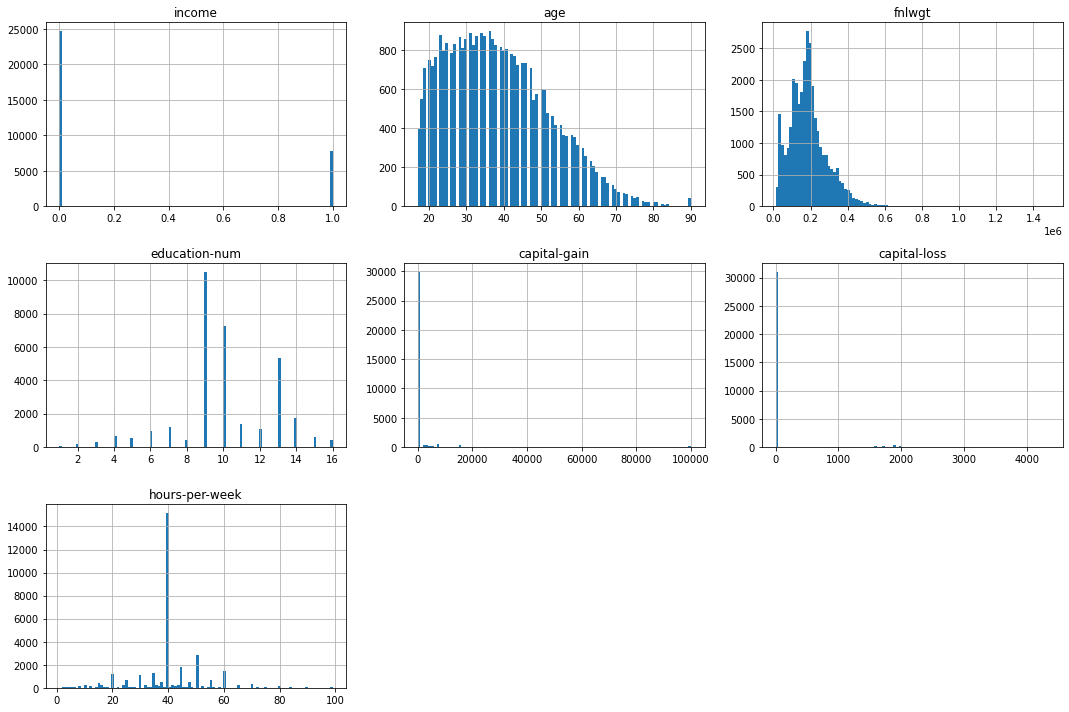

In [22]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['income', 'age','fnlwgt','education-num','capital-gain','capital-loss', 'hours-per-week'])
plt.tight_layout()
plt.show()

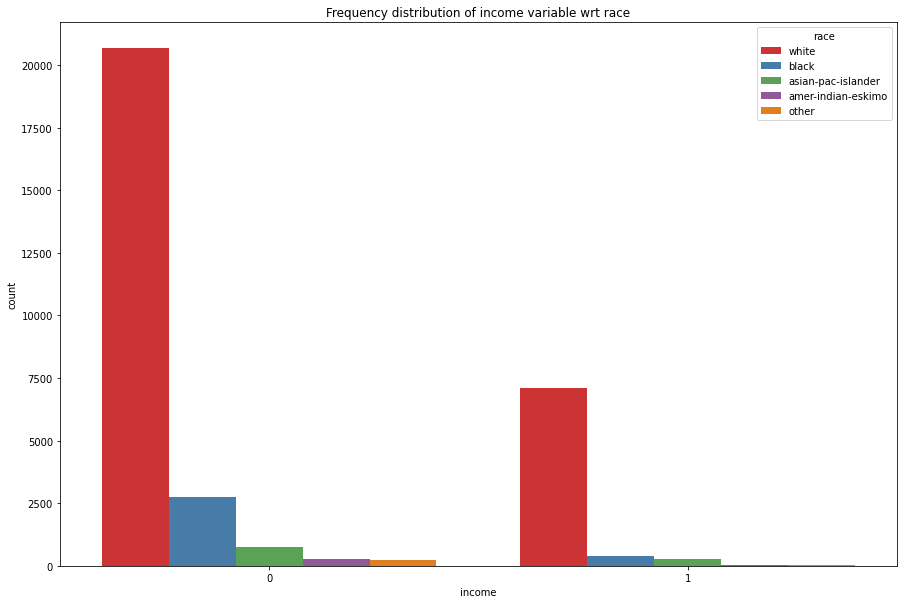

In [23]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

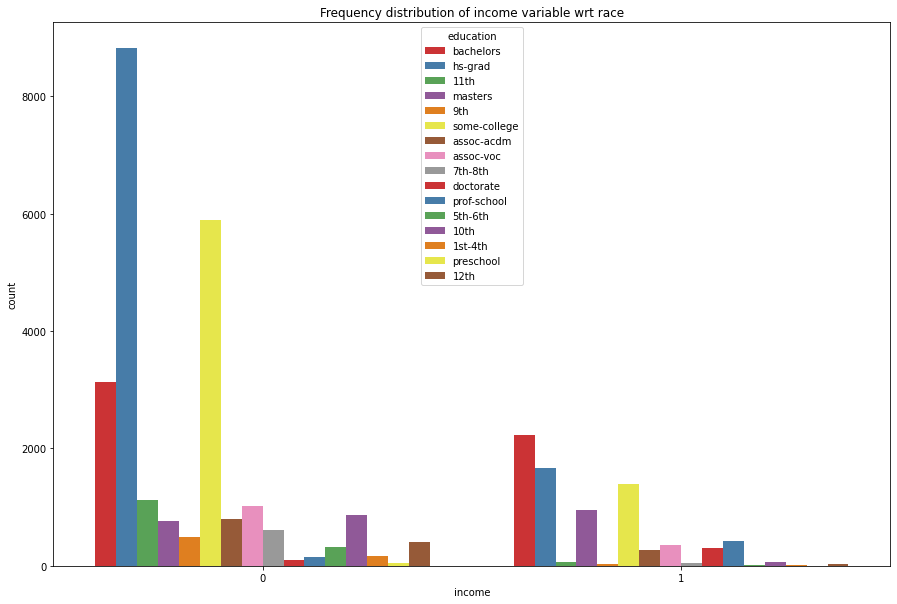

In [24]:
fig2, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(x="income", hue="education", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

Train, val, test set will be 60%, 20%, 20% of the dataset respectively

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
len(df_train), len(df_val), len(df_test)

(19521, 6508, 6508)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.income.values
y_val = df_val.income.values
y_test = df_test.income.values

del df_train['income']
del df_val['income']
del df_test['income']

**Correlation**

Correlation is a statistical technique that shows how two variables are related.

In [29]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.income == '>50k').astype(int)

cor = df_full_train.corr()
cor

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.081099,0.035899,0.078464,0.057658,0.071312,0.237043
fnlwgt,-0.081099,1.000000,-0.043424,0.003517,-0.011553,-0.016086,-0.006780
education-num,0.035899,-0.043424,1.000000,0.126999,0.077956,0.150076,0.337038
capital-gain,0.078464,0.003517,0.126999,1.000000,-0.031346,0.078845,0.220989
capital-loss,0.057658,-0.011553,0.077956,-0.031346,1.000000,0.057815,0.152447
hours-per-week,0.071312,-0.016086,0.150076,0.078845,0.057815,1.000000,0.233585
income,0.237043,-0.006780,0.337038,0.220989,0.152447,0.233585,1.000000


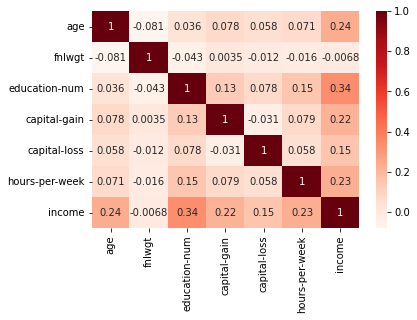

In [30]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

there is no strong correlation between variables.

**Mutual information**

In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
def calculate_mi(series):
    return mutual_info_score(series, df_full_train.income)

In [33]:
df_mi = df_full_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
relationship,0.116779
marital-status,0.110455
education,0.065911
occupation,0.053318
sex,0.025746
workclass,0.012862
native-country,0.006218
race,0.005668


# Model training

Compare different classification models

## LogisticRegression

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
num = ["age",	"fnlwgt",	"education-num",	"capital-gain", "capital-loss", "hours-per-week"]

In [36]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [37]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),4)
print(accuracy)

0.7895


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4567  447]
 [1367  127]]


Feature elimination

In [39]:
features = cat + num
features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [40]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

workclass 0.000932083589428423 0.7885679164105716
education 1.0141364474525183e-05 0.7894898586355255
marital-status 1.0141364474525183e-05 0.7894898586355255
occupation 1.0141364474525183e-05 0.7894898586355255
relationship 1.0141364474525183e-05 0.7894898586355255
race 0.001700368776889949 0.78779963122311
sex 1.0141364474525183e-05 0.7894898586355255
native-country 0.0006247695144437904 0.7888752304855562
age 0.0012393976644130555 0.7882606023355869
fnlwgt -0.03102858020897359 0.8205285802089736
education-num 0.0012393976644130555 0.7882606023355869
capital-gain 0.03273909035033806 0.7567609096496619
capital-loss 0.0010857406269206837 0.7884142593730793
hours-per-week 0.0018540258143823207 0.7876459741856177


**Ridge Regression**

In [41]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [42]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [44]:
for a in [0, 0.01, 0.1, 1, 10, 1e-10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    acc_score = accuracy_score(y_val, y_pred >= 0.5)
    
    print(a, round(score, 3))
    print(confusion_matrix)
    print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_val, y_pred >= 0.5)))
    print()

0 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8390

0.01 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8391

0.1 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8390

1 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8391

10 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8394

1e-10 0.343
[[4567  447]
 [1367  127]]
Model accuracy score : 0.8391



## Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [46]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- marital-status=married-civ-spouse <= 0.50
|   |--- class: 0
|--- marital-status=married-civ-spouse >  0.50
|   |--- class: 0



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

0.395891624364754

In [52]:
scores = []

for n in [10, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)

    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))
    print(score)


df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

0.395891624364754
0.391402690818344
0.3888425451161949


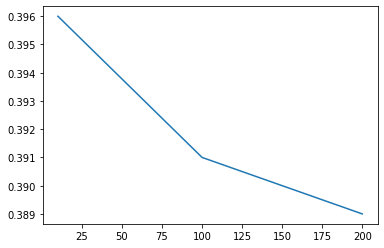

In [53]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

In [54]:
scores = []
max_depths = [10, 15, 20, 25]

for d in max_depths:
    for n in range(10, 150, 10):

        rf = RandomForestClassifier(n_estimators=n,
                                  max_depth=d,
                                  random_state=1, n_jobs=-1,
                                  warm_start=True)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

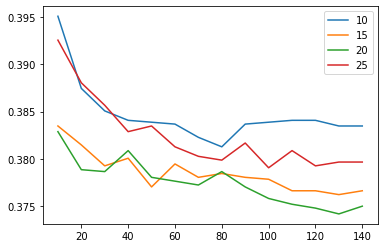

In [55]:
for d in max_depths:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()

Feature Importance

In [56]:
rf.feature_importances_

array([1.18464320e-01, 1.20477095e-01, 3.16636411e-02, 8.05776147e-02,
       1.61365577e-03, 2.83759087e-03, 9.28565015e-04, 3.47558742e-04,
       8.60697905e-04, 2.23350626e-03, 1.27524043e-03, 2.52009758e-03,
       3.17275460e-03, 1.51551299e-02, 5.52693085e-03, 1.00323429e-02,
       1.08085588e-02, 1.63985043e-04, 7.26090876e-03, 6.22668865e-03,
       9.72559505e-02, 7.34085407e-02, 6.41657799e-03, 4.74737387e-04,
       8.97043278e-02, 1.07042090e-03, 3.07254571e-02, 1.67650740e-03,
       2.02447289e-03, 3.10451339e-04, 1.28095880e-03, 5.67088172e-04,
       2.19306164e-04, 7.73945578e-04, 1.03357161e-04, 7.58581875e-05,
       1.38508249e-04, 1.11190434e-03, 3.22997708e-04, 9.69475563e-04,
       2.66410227e-04, 2.53892601e-04, 1.97424043e-04, 1.97238470e-06,
       7.92110617e-06, 2.71429024e-04, 1.86695163e-04, 9.05595624e-04,
       5.24195751e-04, 1.99005178e-04, 8.87041774e-04, 4.25208122e-04,
       5.99894070e-04, 6.13891195e-05, 2.14939729e-03, 1.23335569e-04,
      

In [57]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,age,0.118464
1,capital-gain,0.120477
2,capital-loss,0.031664
3,education-num,0.080578
4,education=10th,0.001614
...,...,...
100,workclass=private,0.010497
101,workclass=self-emp-inc,0.005963
102,workclass=self-emp-not-inc,0.008667
103,workclass=state-gov,0.004296


In [58]:
feature_score = df_importances.sort_values(by='importance', ascending=False)

In [59]:
feature_score

,feature,importance
1,capital-gain,1.204771e-01
0,age,1.184643e-01
20,fnlwgt,9.725595e-02
24,marital-status=married-civ-spouse,8.970433e-02
3,education-num,8.057761e-02
...,...,...
56,native-country=outlying-us(guam-usvi-etc),2.752571e-05
71,occupation=armed-forces,1.053074e-05
44,native-country=honduras,7.921106e-06
43,native-country=holand-netherlands,1.972385e-06


Best Random Forset model

model = RandomForest

max_depths = 10

n_estimator = 100


In [60]:
# instantiate the classifier with n_estimators = 100 and max_depths = 10
model_rfc_100 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)

# fit the model to the training set
model_rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_rfc_100 = model_rfc_100.predict(X_val)

#roc_auc requires the prediction probability of classes and not the class labels
probas = model_rfc_100.predict_proba(X_val) 
 
# Check accuracy score 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_val, y_pred_rfc_100)))

Model accuracy score: 0.8526


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_rfc_100))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4924
           1       0.80      0.52      0.63      1584

    accuracy                           0.85      6508
   macro avg       0.83      0.74      0.77      6508
weighted avg       0.85      0.85      0.84      6508



## ROC AUC evaluation

ROC curves describe the trade-off between the true positive rate (TPR) and false positive (FPR) rate along different probability thresholds for a classifier

In [62]:
from sklearn.metrics import roc_curve, auc

In [63]:
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_val, probas[:,0], pos_label=0)

In [64]:
# get area under the curve
roc_auc = auc(fpr, tpr)

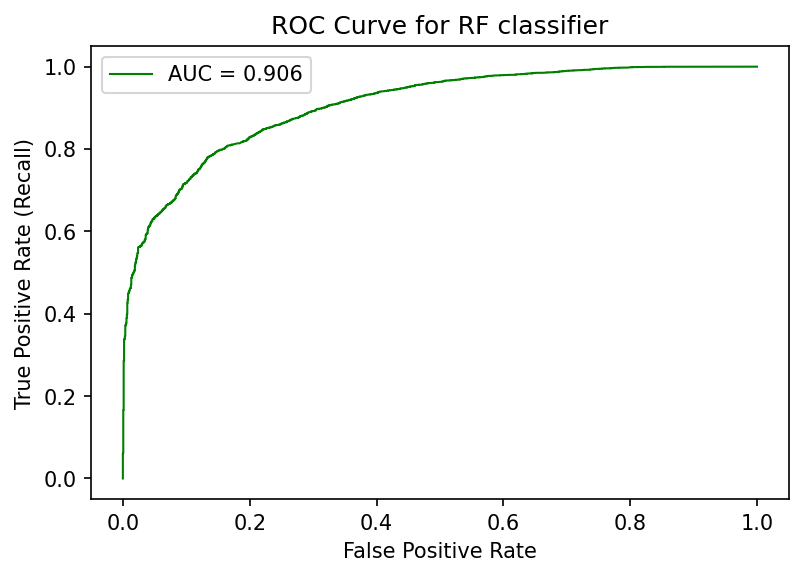

In [65]:
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

We achieve high TPR/Recall while maintaining a low FPR


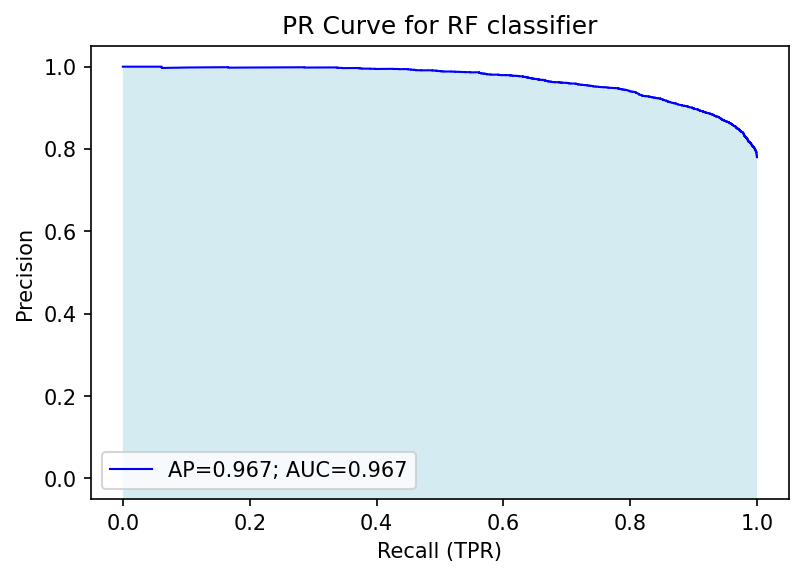

In [66]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_val, probas[:,0], pos_label=0)

# average precision score
avg_precision = average_precision_score(y_val, probas[:,0], pos_label=0)

# precision auc
pr_auc = auc(recall, precision)

# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

we observe a high degree of precision can be maintained while maximizing recall (upper-right corner)

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
roc_auc_score(y_val, y_pred_rfc_100)

0.7411785400717164

## Gradient Boosting


In [69]:
import xgboost as xgb

In [70]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [71]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [72]:
y_pred_xgb = model_xgb.predict(dval)

In [73]:
roc_auc_score(y_val, y_pred_xgb)

0.9141032712379686

In [74]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [75]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:
s = output.stdout

In [77]:
print(s[:200])

[0]	train-auc:0.901731	val-auc:0.890697
[5]	train-auc:0.921369	val-auc:0.90869
[10]	train-auc:0.93085	val-auc:0.914868
[15]	train-auc:0.936222	val-auc:0.917536
[20]	train-auc:0.9411	val-auc:0.919603
[


In [78]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [79]:
df_score = parse_xgb_output(output)

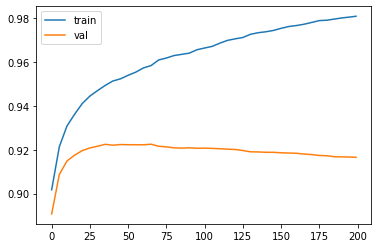

In [80]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

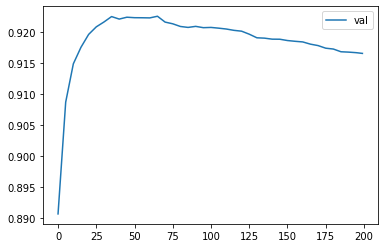

In [81]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

XGBoost parameter tuning

tuning the following parameters:

- eta
- max_depth
- min_child_weight

In [283]:
scores = {}

In [284]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [285]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [286]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [287]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [291]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [292]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

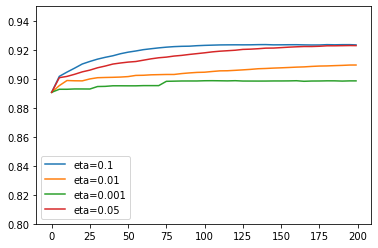

In [293]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.95)
plt.legend()

In [88]:
scores = {}

In [89]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [90]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [91]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [92]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [94]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

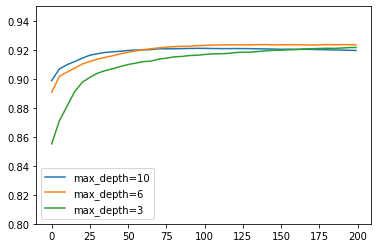

In [95]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.95)
plt.legend()

In [96]:
scores = {}

In [97]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [99]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [100]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [101]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [102]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

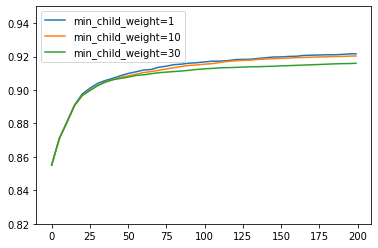

In [103]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.95)
plt.legend()

# Selecting the final model



xgboost

Instead of using the whole training set every time, we can build a tree on slightly different data at each step, which makes it less likely to overfit to a single sample or feature.

* subsample corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
* colsample_bytree corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

In [326]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'colsample_bytree': 1.0,
    'subsample': 0.8,

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In order to automatically find the best number of boosting rounds, we need to pass extra parameters on top of the params dictionary, the training DMatrix and num_boost_round:
* evals: a list of pairs (test_dmatrix, name_of_test). Here we will use our dtest DMatrix.
* early_stopping_rounds: The number of rounds without improvements after which we should stop, here we set it to 10.

In [327]:
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=175, evals=[(dval, "valid")], early_stopping_rounds=10)

[0]	valid-auc:0.891426
Will train until valid-auc hasn't improved in 10 rounds.
[1]	valid-auc:0.897493
[2]	valid-auc:0.898035
[3]	valid-auc:0.89993
[4]	valid-auc:0.900877
[5]	valid-auc:0.901397
[6]	valid-auc:0.902062
[7]	valid-auc:0.903051
[8]	valid-auc:0.904066
[9]	valid-auc:0.904255
[10]	valid-auc:0.905469
[11]	valid-auc:0.90565
[12]	valid-auc:0.906162
[13]	valid-auc:0.906821
[14]	valid-auc:0.90755
[15]	valid-auc:0.907985
[16]	valid-auc:0.909107
[17]	valid-auc:0.909742
[18]	valid-auc:0.910092
[19]	valid-auc:0.910518
[20]	valid-auc:0.9109
[21]	valid-auc:0.91159
[22]	valid-auc:0.912092
[23]	valid-auc:0.912552
[24]	valid-auc:0.912923
[25]	valid-auc:0.913198
[26]	valid-auc:0.913454
[27]	valid-auc:0.913619
[28]	valid-auc:0.913802
[29]	valid-auc:0.914038
[30]	valid-auc:0.914443
[31]	valid-auc:0.914802
[32]	valid-auc:0.914834
[33]	valid-auc:0.915067
[34]	valid-auc:0.91539
[35]	valid-auc:0.915786
[36]	valid-auc:0.916093
[37]	valid-auc:0.916311
[38]	valid-auc:0.916491
[39]	valid-auc:0.916516


In [328]:
y_pred_xgb = model_xgb.predict(dval)
roc_auc_score(y_val, y_pred_xgb)

0.9222921359205376

# Save the model

In [334]:
print(xgb.__version__)

0.90


In [335]:
import pickle

In [336]:
output_file_xgb = f'model_I_xgb.bin'

In [337]:
f_out = open(output_file_xgb, 'wb') 
pickle.dump((dv, model_xgb), f_out)
f_out.close()

In [338]:
!ls

model_I_xgb.bin  sample_data


Import and use model

In [339]:
input_file = 'model_I_xgb.bin'

In [340]:
with open(input_file, 'rb') as f_in:
    dv_loaded, model_loaded = pickle.load(f_in)

In [341]:
model_loaded

In [342]:
# 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
# "age",	"fnlwgt",	"education-num",	"capital-gain", "capital-loss", "hours-per-week"

person = {
    'age': 45,
    'workclass': 'private',
    'fnlwgt': 209642,
    'education': 'masters',
    'education-num': 14,
    'marital-status': 'married-civ-spouse',
    'occupation': 'exec-managerial',
    'relationship': 'husband',
    'race': 'white',
    'sex': 'male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 45,
    'native-country': 'united-states'
}



In [343]:
X = dv_loaded.transform([person])

In [344]:
model_features = model_loaded.feature_names

In [345]:
dval_o = xgb.DMatrix(X, feature_names=model_features)
y_pred_o = model_loaded.predict(dval_o, ntree_limit=model_loaded.best_iteration)

In [346]:
print('input:', person)
print('output:', y_pred_o)

input: {'age': 45, 'workclass': 'private', 'fnlwgt': 209642, 'education': 'masters', 'education-num': 14, 'marital-status': 'married-civ-spouse', 'occupation': 'exec-managerial', 'relationship': 'husband', 'race': 'white', 'sex': 'male', 'capital-gain': 0, 'capital-loss': 0, 'hours-per-week': 45, 'native-country': 'united-states'}
output: [0.8934437]
